In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

In [2]:
path='/kaggle/input/digit-recognizer/train.csv'
trainset=pd.read_csv(path)
trainset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from torch.utils.data import DataLoader

In [4]:
trainset.drop('label',axis=1)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__*sample data*__

In [5]:
sample=np.array(trainset.drop('label',axis=1).iloc[6])
sample=sample.reshape((28,-1))

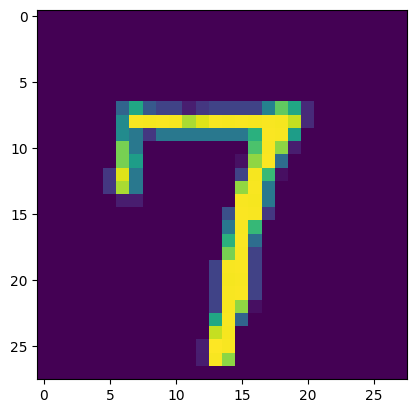

In [6]:
plt.imshow(sample)
plt.show()

## 1-Data

In [7]:
dt=trainset.copy()

__*removing outliers*__

In [8]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.05)
outliers = (lof.fit_predict(dt) == -1)

In [9]:
indices=[]
for i in range(len(outliers)):
    if outliers[i]==True:
        indices.append(i)

In [10]:
dt=dt.drop(indices)

In [11]:
dt

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_tensor=torch.from_numpy(np.array(dt))

In [13]:
train_tensor

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [7, 0, 0,  ..., 0, 0, 0],
        [6, 0, 0,  ..., 0, 0, 0],
        [9, 0, 0,  ..., 0, 0, 0]])

In [14]:
from torch.utils.data import Dataset

In [15]:
class digits_dataset(Dataset):
    def __init__(self):
        data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
        self.y=torch.from_numpy(np.array(data['label']))
        self.x=torch.from_numpy(np.array(data.drop('label',axis=1))/255)
    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [16]:
data=digits_dataset()

In [17]:
train ,test = torch.utils.data.random_split(data,[0.8,0.2])

In [18]:
x,y=train[0]

In [19]:
train.__len__()

33600

In [20]:
print(x.shape)

torch.Size([784])


## 2-Neural Network and Model

In [21]:
train_loader=DataLoader(dataset=train,batch_size=200,shuffle=True)

In [22]:
model=nn.Sequential(nn.Linear(28*28,512),
                    nn.ReLU(),
                    nn.Linear(512,512),
                    nn.ReLU(),
                    #nn.Dropout(p=0.2),
                    nn.Linear(512,256),
                    nn.Linear(256,10)
                    )

## 3-Training 

In [23]:
criterion=nn.CrossEntropyLoss()

In [24]:
import torch.optim as optim

In [25]:
optimizer=optim.Adam(params=model.parameters(),lr=0.001)

### a-Train loop 

In [26]:
for epoch in range(100):
    training_loss = 0
    for data in train_loader:
        #setting gradient at zero
        optimizer.zero_grad()
        #getting data
        features,label=data
        features=features.float()
        #predicting class
        pred=model(features)
        #loss
        loss=criterion(pred,label)
        loss.backward()
        #updating params
        optimizer.step()
        training_loss += loss.item()
    epoch_loss = training_loss / len(train_loader)
    print(f'loss {epoch_loss} for {epoch+1}/100')


loss 0.3945282185450196 for 1/100
loss 0.13038964376651815 for 2/100
loss 0.08153932381953512 for 3/100
loss 0.054409524403689874 for 4/100
loss 0.03898695943089912 for 5/100
loss 0.030697441851121506 for 6/100
loss 0.022565944893618246 for 7/100
loss 0.0180487445613835 for 8/100
loss 0.018792299350025132 for 9/100
loss 0.013396340290498864 for 10/100
loss 0.01847231463831295 for 11/100
loss 0.02197605133066342 for 12/100
loss 0.010129142469113936 for 13/100
loss 0.012808148013781257 for 14/100
loss 0.012887999123319917 for 15/100
loss 0.010130532358743949 for 16/100
loss 0.00944905407444215 for 17/100
loss 0.018254668729977788 for 18/100
loss 0.004344547897614705 for 19/100
loss 0.004979433184806632 for 20/100
loss 0.008923451913038402 for 21/100
loss 0.009577398801151762 for 22/100
loss 0.008847618734405063 for 23/100
loss 0.015421643431615112 for 24/100
loss 0.0036223572290921204 for 25/100
loss 0.000875838408985276 for 26/100
loss 0.006693108464511559 for 27/100
loss 0.012419161206

### b-Validation loop

In [27]:
test_loader=DataLoader(dataset=test,batch_size=200,shuffle=False)

In [28]:
validation_loss = 0.0
model.eval() # Put model in evaluation mode
with torch.no_grad(): # Speed up the forward pass
    training_loss = 0
    for data in test_loader:
        #getting data
        features,label=data
        features=features.float()
        #predicting class
        pred=model(features)
        #loss
        loss=criterion(pred,label)
        validation_loss += loss.item()
    validation_loss = validation_loss / len(test_loader)
    print(f'validation loss is {validation_loss}')
model.train()


validation loss is 0.1986173568979471


Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=256, bias=True)
  (5): Linear(in_features=256, out_features=10, bias=True)
)

In [29]:
import torchmetrics
# Create accuracy metric using torch metrics
metric = torchmetrics.Accuracy(task="multiclass", num_classes=10)
for i, data in enumerate(test_loader, 0):
    features, labels = data
    features=features.float()
    outputs = model(features)
    # Calculate accuracy over the batch
    acc = metric(outputs, labels)
# Calculate accuracy over the whole epoch
acc = metric.compute()
print(f"Accuracy on all data: {acc}")
# Reset the metric for the next epoch (training or validation)
metric.reset()

Accuracy on all data: 0.9801190495491028


## 4-Test and Submission

### a-Predicting submission data

In [30]:
submi=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [31]:
X_submi=torch.from_numpy(np.array(submi)/255)
X_submi=X_submi.float()

In [32]:
with torch.no_grad():    
    output=model(X_submi)
    softmax=nn.Softmax(-1)(output)

In [33]:
predicted=torch.argmax(output,1)
predicted

tensor([2, 0, 9,  ..., 3, 9, 2])

In [34]:
label=np.array(predicted)

### b-Submiting data

In [35]:
ImageId=np.array([i for i in range(1,len(label)+1)])

In [36]:
submission=pd.DataFrame({'ImageId':ImageId,'Label':label})

In [37]:
submission.to_csv('/kaggle/working/submission.csv',index=False)

In [38]:
submission_path='/kaggle/working/submission.csv'
pd.read_csv(submission_path)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
